In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.company_data_pipeline import *
from src.ticker_data_pipeline import *
from src.model_pipeline import *
from src.model import Model
from sklearn.preprocessing import normalize

%matplotlib inline

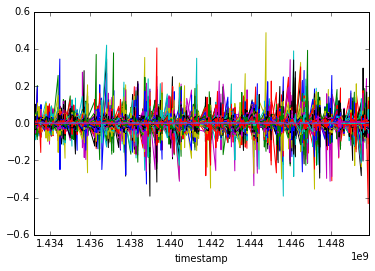

In [2]:
# This function loads ticker data from the file, cleans it, and returns it as a pandas data frame
# It is slow.
# t_df = create_ticker_price_df()
# pickle_ticker_price_df(t_df)
ticker_df = unpickle_ticker_price_df()


# Takes the percent change and does some other cleaning
dif_df = diff_df(ticker_df)
dif_df.plot(legend=False)

In [4]:
company_df_, feature_names_ = get_company_description_df_and_feature_names()

In [6]:
company_df_

,description,tfidf
ticker,,
aaap,We are an innovative radiopharmaceutical compa...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aal,"American Airlines Group Inc. (AAG), a Delaware...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aame,"Atlantic American Corporation, a Georgia corpo...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaoi,This report contains forward-looking statement...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaon,"AAON, Inc., a Nevada corporation, (""AAON Nevad...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaon,"AAON, Inc., a Nevada corporation, (""AAON Nevad...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aapc,We are a newly organized blank check company i...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aavl,We are a clinical-stage biotechnology company ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aaww,The following represents terms and statistics ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
pickle_company_df(company_df_) # This isn't pickling well.  It's 1.5gb as a pickle
                                # but seems to be much smaller in memory
pickle_feature_names(feature_names_)

company_df = unpickle_company_df()
feature_names = unpickle_feature_names()

In [5]:
m_ = Model(company_df, feature_names, n_components=5)

In [7]:
m_.fit(dif_df)

/Users/Brian/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':


In [9]:
import cPickle as pickle

with open("factorization", 'w') as f:
    pickle.dump(m_.factorization, f)

In [ ]:

pickle_model(m_)
m = unpickle_model()

In [ ]:
def draw_importances_graph(names, importances, title, ax):
    n = len(names)
    #ax.figure()
    ax.set_title(title, fontdict={'fontsize': 10})
    ax.bar(range(n), importances,
           color="r", align="center")
    ax.set_xticks(range(n))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim([-1, n])
    labels = ax.get_xticks()
    ax.tick_params(labelsize=20)

In [ ]:
def graph_component(d):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 18))
    f.subplots_adjust(bottom=0.01)

    draw_importances_graph(d['companies_con'],
                           d['importances_con'], 
                           "Company Importances Con",
                           ax1)

    draw_importances_graph(d['words_con'],
                           d['word_importances_con'], 
                           "Word Importances Con",
                           ax2)

    draw_importances_graph(d['companies_pro'],
                           d['importances_pro'], 
                           "Company Importances Pro",
                           ax3)

    draw_importances_graph(d['words_pro'],
                           d['word_importances_pro'], 
                           "Word Importances Pro",
                           ax4)


In [ ]:
d = m.analyze_principle_component(4)
graph_component(d)

# one graph with all companies

In [ ]:
# Components:
#     0 - Banking
#     1 - Biotech 
#     2 - International - China, Caymen Islands, Canada, Asia/Europe etc.  Does it 
#         reflect the value of the US Dollar?
#     3 - Oil, gas, coal
#     4 - Another Biotech and one Chinese social media company (fluke?)

In [ ]:
m.transform(dif_df).plot()


In [ ]:
# We can clean up the data and get better results by finding a way to dedupe the list of
# companies.  Some are subsidiaries of the others and track very closely.  These are then 
# overrepresented in the data.

In [ ]:
# We could try daily instead of hourly.  

In [ ]:
# TODO: Weight the tfidf average by company importance.  